In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pd
import xlsxwriter 
import os

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pdr
import os
import glob as glob
import xlsxwriter
dir_list = os.listdir('EMG_and_ECG')
dir_list.sort()
pairs = []
row=0
workbook = xlsxwriter.Workbook('Filenames.xlsx')
bold = workbook.add_format({'bold': True})
worksheet = workbook.add_worksheet('EMG')
worksheet.write(row,0,'Participant',bold)
worksheet.write(row,1,'EMG_Filename',bold)
worksheet = workbook.add_worksheet('ECG')
worksheet.write(row,0,'Participant',bold)
worksheet.write(row,1,'ECG_Filename',bold)
row+=1
folders=['EMG','zephyr']
param={'EMG':'EMG','zephyr':'ECG'}
for i in range(len(dir_list)):
    for j in range(len(folders)):
        worksheet=workbook.get_worksheet_by_name(param[folders[j]])
        if os.path.isdir('EMG_and_ECG'+'/'+dir_list[i]+'/'+folders[j]):
            files = os.listdir('EMG_and_ECG'+'/'+dir_list[i]+'/'+folders[j])
            size = os.path.getsize('EMG_and_ECG'+'/'+dir_list[i]+'/'+folders[j])
            pairs.append((size, files))
            pairs.sort(key=lambda s: s[0])
            worksheet.write(i+1,1,pairs[0][1][len(pairs[0][1])-1])
        worksheet.write(i+1,0,dir_list[i])
        pairs.clear()
workbook.close()                                



In [ ]:
!dir

In [ ]:
param={'EMG':'EMG','zephyr':'ECG'}

In [ ]:
list=param.keys()

In [ ]:
a=[1,2]
b=[3,4]
c=[]
c.append((b,a))
c[0][1][len(c[0][1])-1]

In [ ]:
Ref=pd.read_excel(r'Filenames.xlsx','EMG')

In [ ]:
Ref.head

In [ ]:
pd.isnull(Ref.loc[0,'EMG_Filename'])

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pdr
import os
import glob as glob
import xlsxwriter
dir_list = os.listdir('EMG_and_ECG')
Ref1=pd.read_excel(r'Filenames.xlsx','EMG')
dir_list.sort()
pairs = []
folders=['EMG','zephyr']
param={'EMG':'EMG','zephyr':'ECG'}
j=0
low_cutoff=10
high_cutoff=100
freq=512
order=4
if not os.path.isdir('EMG_Filtered_Split'):
    os.mkdir('EMG_Filtered_Split')
Ref=pd.read_excel(r'numpyref.xlsx')
xls = pd.ExcelFile(r'Time.xlsx')
for i in range(1,len(dir_list)):
    Time1 = pd.read_excel(xls, Ref.TITLE_SHEET[i],header=None)
    Time=pd.to_datetime(Time1[1],unit='s')
    Time.index=Time
    Time.index=Time.index.round('1ms')
    if os.path.isdir('EMG_and_ECG'+'/'+dir_list[i]+'/'+folders[j]):
        file=pd.read_csv('EMG_and_ECG'+'/'+dir_list[i]+'/'+folders[j]+'/'+Ref1.iloc[i,1],sep='\t',header=0,skiprows=[0,2,3,4,5])
        Ch1=pd.Series(butter_bandpass_filter(file.iloc[:,2],low_cutoff,high_cutoff, freq, order),name=list(file.columns)[2])
        Ch2=pd.Series(butter_bandpass_filter(file.iloc[:,3],low_cutoff,high_cutoff, freq, order),name=list(file.columns)[3])
        Time2=file.iloc[:,0]
        data=pd.concat([Time2,abs(Ch1), abs(Ch2)], axis=1)
        data.drop_duplicates((file.columns)[0],keep='first',inplace=True)
        data.index=pd.to_datetime(data[file.columns[0]], unit='ms')
        data.index=data.index.round('1ms')
        data =data[(data.index >= (Time.index[13])) & (data.index<=(Time.index[14])) ]
        data_rel =data[(data.index >= (Time.index[7])) & (data.index<=(Time.index[8])) ]
        data_stre =data[(data.index >= (Time.index[11])) & (data.index<=(Time.index[12])) ]
        data_cal =data[(data.index >= (Time.index[5])) & (data.index<=(Time.index[6])) ]
        data_mat =data[(data.index >= (Time.index[9])) & (data.index<=(Time.index[10])) ]
        writer = pd.ExcelWriter('EMG_Filtered_Split'+'/'+Ref.OUTPUT[i])
        data_rel.to_excel(writer,'Rel_Dri')
        data_stre.to_excel(writer,'Str_Dri')
        data_cal.to_excel(writer,'Cal')
        data_mat.to_excel(writer,'Math')
        writer.save()


/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

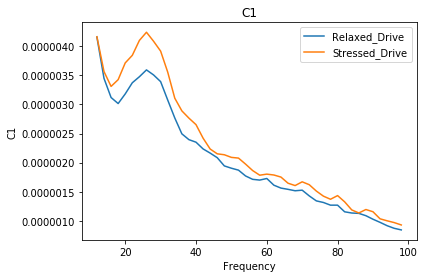

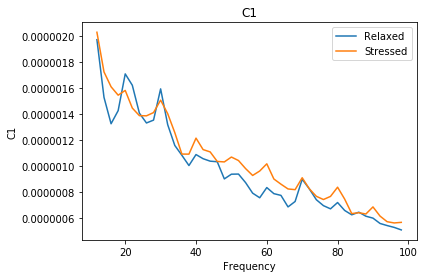

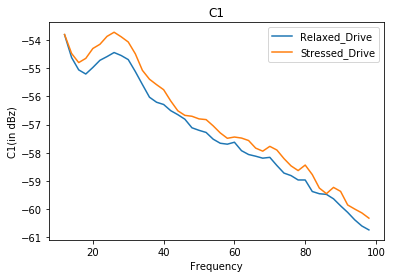

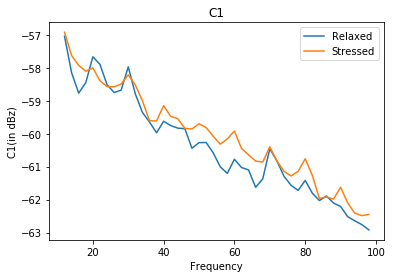

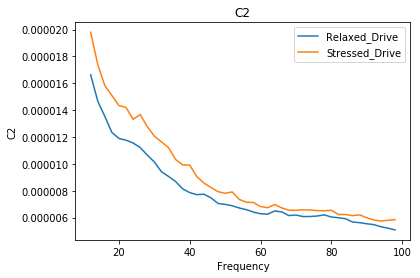

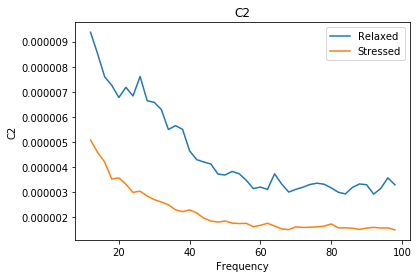

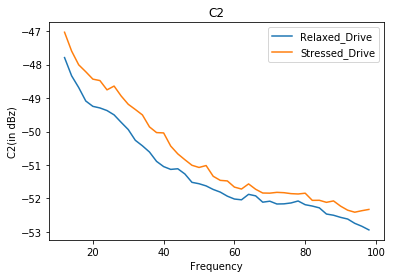

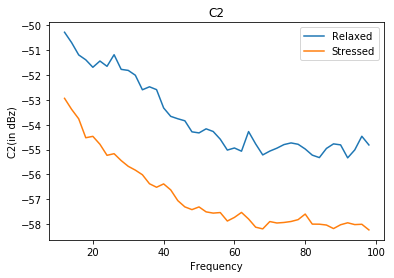

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pdr
import os
import glob as glob
import xlsxwriter
from scipy import signal
if not os.path.isdir('EMG_Spectrogram'):
    os.mkdir('EMG_Spectrogram')
if not os.path.isdir('EMG_Spectrogram/PSD_Data'):
    os.mkdir('EMG_Spectrogram/PSD_Data')
if not os.path.isdir('EMG_Spectrogram/Plots'):
    os.mkdir('EMG_Spectrogram/Plots')
sheets=['Rel_Dri','Str_Dri','Cal','Math']
dir_list = glob.glob('EMG_Filtered_Split/*.xlsx')
dir_list.sort()
workbook = xlsxwriter.Workbook('IMU_PSD_data.xlsx') 
row=0
channel=['C1','C2']
col={'C1':2,'C2':3}
bold = workbook.add_format({'bold': True})
for i in range(len(dir_list)):
    savefigpath=dir_list[i].replace('EMG_Filtered_Split','EMG_Spectrogram/Plots')
    filepath=dir_list[i].replace('EMG_Filtered_Split','EMG_Spectrogram/PSD_Data')
    partname=dir_list[i].replace('EMG_Filtered_Split','')
    partname=partname.replace('.xlsx','')
    filepath=filepath.replace('.xlsx','_PSD.xlsx')
    savefigpath=savefigpath.replace('.xlsx','_')
    writer = pd.ExcelWriter(filepath)
    for j in range(len(channel)):
        RD = pd.read_excel(dir_list[i], sheets[0],header=0)
        SD = pd.read_excel(dir_list[i], sheets[1],header=0)
        C = pd.read_excel(dir_list[i], sheets[2],header=0)
        M = pd.read_excel(dir_list[i], sheets[3],header=0)
        """
        fig=plt.figure()
        if workbook.get_worksheet_by_name(channel[j]):
                worksheet=workbook.get_worksheet_by_name(channel[j])
        else:
            worksheet = workbook.add_worksheet(channel[j])
            row=0
            worksheet.write(row,0,'Participant',bold)
            worksheet.write(row,1,'MPF_Stressed_Driving',bold)
            worksheet.write(row,2,'MPF_Relaxed_Driving',bold)
            worksheet.write(row,3,'(MPF_Rel-MPF_Str)',bold)
            worksheet.write(row,4,'Area_Str',bold)
            worksheet.write(row,5,'Area_Rel',bold)
            worksheet.write(row,6,'Max_Power_Str',bold)
            worksheet.write(row,7,'Dom_Freq_Str',bold)
            worksheet.write(row,8,'Max_Power_Rel',bold)
            worksheet.write(row,9,'Dom_Freq_Rel',bold)

            worksheet.write(row,11,'Participant',bold)
            worksheet.write(row,12,'MPF_Math_Driving',bold)
            worksheet.write(row,13,'MPF_Calm_Driving',bold)
            worksheet.write(row,14,'(MPF_Calm-Math_Str)',bold)
            worksheet.write(row,15,'Area_Math',bold)
            worksheet.write(row,16,'Area_Calm',bold)
            worksheet.write(row,17,'Max_Power_Math',bold)
            worksheet.write(row,18,'Dom_Freq_Math',bold)
            worksheet.write(row,19,'Max_Power_Calm',bold)
            worksheet.write(row,20,'Dom_Freq_Calm',bold)
            row+=1
        """
        RD_Data=plt.psd(RD[RD.columns[col[channel[j]]]], Fs=512)
        SD_Data=plt.psd(SD[SD.columns[col[channel[j]]]], Fs=512)
        #plt.xlim((10,100))
        #plt.legend(('Relaxed Driving','Stressed Driving'))
        #plt.savefig(savefigpath+channel[j]+'_Driv.png')
        plt.clf()
        plt.figure()
        C_Data=plt.psd(C[C.columns[col[channel[j]]]], Fs=512)
        M_Data=plt.psd(M[M.columns[col[channel[j]]]], Fs=512)
        #plt.legend(('Calm Relax','Math Stressor'))
        #plt.savefig(savefigpath+channel[j]+'_Cond.png')
        plt.clf()
        MPF_RD=np.linalg.norm(np.multiply(RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)],RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)]),1)/np.linalg.norm(RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)],1)
        MPF_SD=np.linalg.norm(np.multiply(SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)],SD_Data[1][(SD_Data[1]>10)&(SD_Data[1]<100)]),1)/np.linalg.norm(SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)],1)
        MPF_C=np.linalg.norm(np.multiply(C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)],C_Data[1][(C_Data[1]>10)&(C_Data[1]<100)]),1)/np.linalg.norm(C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)],1)
        MPF_M=np.linalg.norm(np.multiply(M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)],M_Data[1][(M_Data[1]>10)&(M_Data[1]<100)]),1)/np.linalg.norm(M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)],1)
        
        Math_PSD_DATA=pd.DataFrame({'freq':M_Data[1][(M_Data[1]>10)&(M_Data[1]<100)],'Power':M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)]})
        Calm_PSD_DATA=pd.DataFrame({'freq':C_Data[1][(C_Data[1]>10)&(C_Data[1]<100)],'Power':C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)]})
        RD_PSD_DATA=pd.DataFrame({'freq':RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],'Power':RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)]})
        SD_PSD_DATA=pd.DataFrame({'freq':SD_Data[1][(SD_Data[1]>10)&(SD_Data[1]<100)],'Power':SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)]})
        SD_PSD_DATA.to_excel(writer,'Stressed_Drive_'+channel[j])
        RD_PSD_DATA.to_excel(writer,'Relaxed_Drive_'+channel[j])
        Math_PSD_DATA.to_excel(writer,'Math_'+channel[j])
        Calm_PSD_DATA.to_excel(writer,'Calm_'+channel[j])
        
        """
        worksheet.write(row,0,partname)
        worksheet.write(row,1,MPF_SD)
        worksheet.write(row,2,MPF_RD)
        worksheet.write(row,3,(MPF_RD-MPF_SD))
        worksheet.write(row,4,np.linalg.norm(np.multiply(SD_data[0][(SD_Data[1]>10)&(SD_Data[1]<100)],SD_data[1][(SD_Data[1]>10)&(SD_Data[1]<100)]),1))
        worksheet.write(row,5,np.linalg.norm(np.multiply(RD_data[0][(RD_Data[1]>10)&(RD_Data[1]<100)],RD_data[1][(RD_Data[1]>10)&(RD_Data[1]<100)]),1))
        worksheet.write(row,6,SD_Data[0][np.argmax(SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)])])
        worksheet.write(row,7,SD_Data[1][np.argmax(SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)])])
        worksheet.write(row,8,RD_Data[0][np.argmax(RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)])])
        worksheet.write(row,9,RD_Data[1][np.argmax(RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)])])
        
        worksheet.write(row,11,partname)
        worksheet.write(row,12,MPF_M)
        worksheet.write(row,13,MPF_C)
        worksheet.write(row,14,(MPF_C-MPF_M))
        worksheet.write(row,15,np.linalg.norm(np.multiply(M_data[0][(M_Data[1]>10)&(M_Data[1]<100)],M_data[1][(M_Data[1]>10)&(M_Data[1]<100)]),1))
        worksheet.write(row,16,np.linalg.norm(np.multiply(C_data[0][(C_Data[1]>10)&(C_Data[1]<100)],C_data[1][(C_Data[1]>10)&(C_Data[1]<100)]),1))
        worksheet.write(row,17,M_Data[0][np.argmax(M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)])])
        worksheet.write(row,18,M_Data[1][np.argmax(M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)])])
        worksheet.write(row,19,C_Data[0][np.argmax(C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)])])
        worksheet.write(row,20,C_Data[1][np.argmax(C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)])])
        """
        if not (j or i):
            RD_PSD_Average=np.zeros((len(RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)]),2))
            SD_PSD_Average=np.zeros((len(SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)]),2))
            C_PSD_Average=np.zeros((len(C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)]),2))
            M_PSD_Average=np.zeros((len(M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)]),2))
        RD_PSD_Average[:,j]+=RD_Data[0][(RD_Data[1]>10)&(RD_Data[1]<100)]
        SD_PSD_Average[:,j]+=SD_Data[0][(SD_Data[1]>10)&(SD_Data[1]<100)]
        C_PSD_Average[:,j]+=C_Data[0][(C_Data[1]>10)&(C_Data[1]<100)]
        M_PSD_Average[:,j]+=M_Data[0][(M_Data[1]>10)&(M_Data[1]<100)]
    writer.save()
    plt.clf()
    row+=1
RD_PSD_Average=RD_PSD_Average/len(dir_list)
SD_PSD_Average=SD_PSD_Average/len(dir_list)
M_PSD_Average=M_PSD_Average/len(dir_list)
C_PSD_Average=C_PSD_Average/len(dir_list)
workbook.close() 


RD_Avg=pd.DataFrame(RD_PSD_Average)
M_Avg=pd.DataFrame(M_PSD_Average)
C_Avg=pd.DataFrame(C_PSD_Average)
SD_Avg=pd.DataFrame(SD_PSD_Average)
SD_Avg.columns=channel
RD_Avg.columns=channel
M_Avg.columns=channel
C_Avg.columns=channel

RD_Avg.to_csv(r'EMG_Spectrogram/RD_Avg.csv')
SD_Avg.to_csv(r'EMG_Spectrogram/SD_Avg.csv')
C_Avg.to_csv(r'EMG_Spectrogram/C_Avg.csv')
M_Avg.to_csv(r'EMG_Spectrogram/M_Avg.csv')

os.mkdir('EMG_Spectrogram/log')
os.mkdir('EMG_Spectrogram/reg')
for j in RD_Avg.columns:
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(RD_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(SD_Avg[j]))
    plt.legend(('Relaxed_Drive','Stressed_Drive'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j)
    plt.savefig('EMG_Spectrogram/reg/'+j+'_Drive.png')
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(C_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(M_Avg[j]))
    plt.legend(('Relaxed','Stressed'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j)
    plt.savefig('EMG_Spectrogram/reg/'+j+'_Stressor.png')
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(RD_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(SD_Avg[j]))
    plt.legend(('Relaxed_Drive','Stressed_Drive'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j+'(in dBz)')
    plt.savefig('EMG_Spectrogram/log/'+j+'_Drive.png')
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(C_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(M_Avg[j]))
    plt.legend(('Relaxed','Stressed'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j+'(in dBz)')
    plt.savefig('EMG_Spectrogram/log/'+j+'_Stressor.png')

In [17]:
sheets=['Rel_Dri','Str_Dri','Cal','Math']
dir_list = os.listdir('EMG_Filtered_Split')
i=20
RD = pd.read_excel('EMG_Filtered_Split/'+dir_list[i], sheets[0],header=0)
SD = pd.read_excel('EMG_Filtered_Split/'+dir_list[i], sheets[1],header=0)
C = pd.read_excel('EMG_Filtered_Split/'+dir_list[i], sheets[2],header=0)
M = pd.read_excel('EMG_Filtered_Split/'+dir_list[i], sheets[3],header=0)

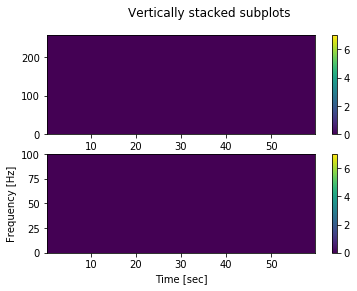

In [7]:
from scipy import signal
val=512*60
f,t,Sxx=signal.spectrogram(C[C.columns[2]][:val], fs=512)
f1,t1,Sxx1=signal.spectrogram(M[M.columns[2]][:val], fs=512)
fig, axs = plt.subplots(2)
fig.suptitle('Vertically stacked subplots')
z1=axs[0].pcolormesh(t, f, (Sxx),vmax=10*np.log10(5))
plt.ylim((0,100))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
z2=axs[1].pcolormesh(t1, f1, (Sxx1),vmax=10*np.log10(5))
plt.colorbar(z2, ax=axs[1])
plt.colorbar(z1, ax=axs[0])
plt.ylim((0,100))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()
                              

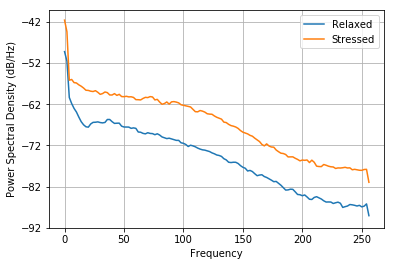

In [24]:
Data=plt.psd(C[C.columns[2]], Fs=512)
Data=plt.psd(M[M.columns[2]], Fs=512)
plt.legend(('Relaxed','Stressed'))

In [51]:
dir_list = os.listdir('EMG_Filtered_Split')
test=dir_list[10].replace('B','')
test.replace('.xlsx','+eet.png')

'325+eet.png'

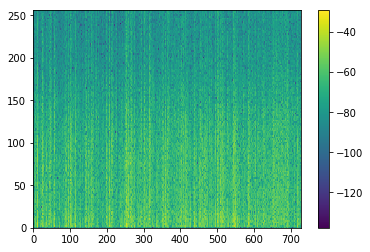

In [97]:
f,t,Sxx=signal.spectrogram(RD[RD.columns[2]][:], fs=512)
plt.pcolormesh(t, f, 10*np.log10(Sxx))
plt.colorbar()

In [58]:
dir_list[0]

'EMG_Filtered_Split/B319.xlsx'

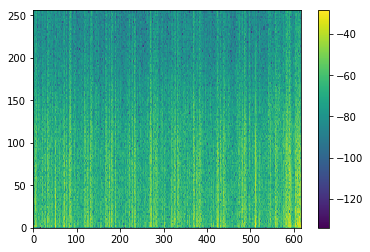

In [98]:
f1,t1,Sxx1=signal.spectrogram(SD[SD.columns[2]][:], fs=512)
plt.pcolormesh(t1, f1, 10*np.log10(Sxx1))
plt.colorbar()

In [62]:
filepath

'EMG_Filtered_Split/B306_PSD.xlsx'

In [2]:
import numpy as np
a=np.empty()

TypeError: Required argument 'shape' (pos 1) not found

In [65]:
RD_PSD_Average=RD_PSD_Average/len(dir_list)
SD_PSD_Average=SD_PSD_Average/len(dir_list)
M_PSD_Average=M_PSD_Average/len(dir_list)
C_PSD_Average=C_PSD_Average/len(dir_list)
workbook.close() 

RD_Avg=pd.DataFrame(RD_PSD_Average)
M_Avg=pd.DataFrame(M_PSD_Average)
C_Avg=pd.DataFrame(C_PSD_Average)
SD_Avg=pd.DataFrame(SD_PSD_Average)
SD_Avg.columns=channel
RD_Avg.columns=channel
M_Avg.columns=channel
C_Avg.columns=channel

RD_Avg.to_csv(r'EMG_Spectrogram/RD_Avg.csv')
SD_Avg.to_csv(r'EMG_Spectrogram/SD_Avg.csv')
C_Avg.to_csv(r'EMG_Spectrogram/C_Avg.csv')
M_Avg.to_csv(r'EMG_Spectrogram/M_Avg.csv')

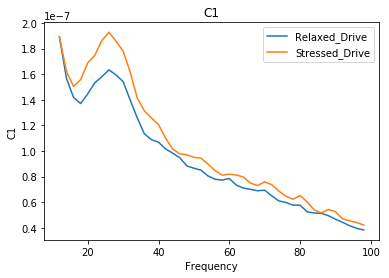

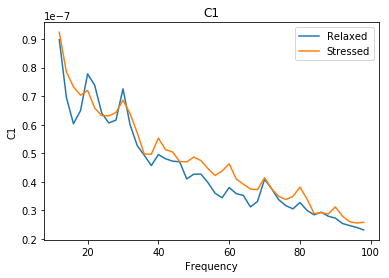

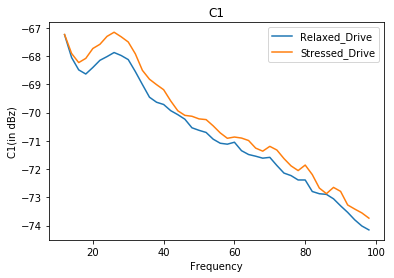

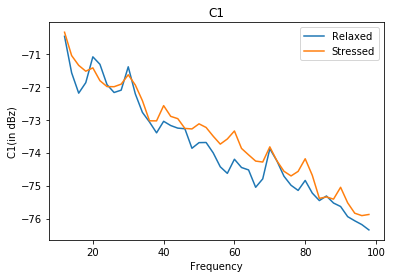

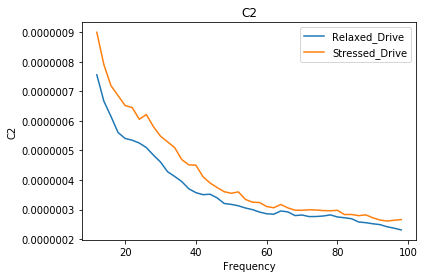

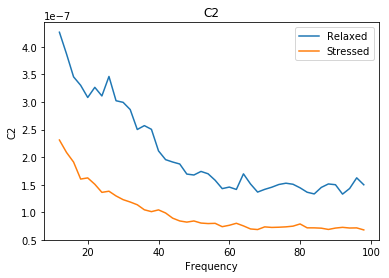

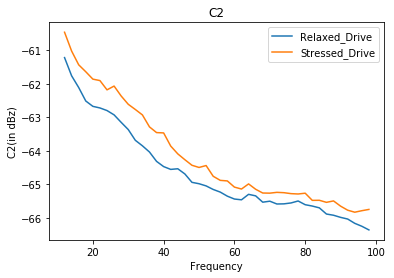

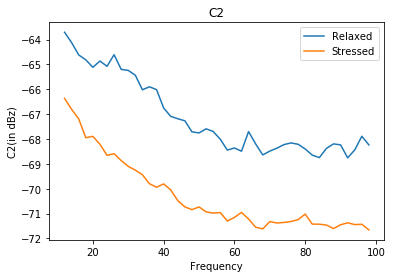

In [71]:
#os.mkdir('EMG_Spectrogram/log')
#os.mkdir('EMG_Spectrogram/reg')
for j in RD_Avg.columns:
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(RD_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(SD_Avg[j]))
    plt.legend(('Relaxed_Drive','Stressed_Drive'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j)
    plt.savefig('PSD_IMU_Data/MeanPSD/reg/'+j+'_Drive.png')
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(C_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],(M_Avg[j]))
    plt.legend(('Relaxed','Stressed'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j)
    plt.savefig('PSD_IMU_Data/MeanPSD/reg/'+j+'_Stressor.png')
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(RD_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(SD_Avg[j]))
    plt.legend(('Relaxed_Drive','Stressed_Drive'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j+'(in dBz)')
    plt.savefig('PSD_IMU_Data/MeanPSD/log/'+j+'_Drive.png')
    fig=plt.figure()
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(C_Avg[j]))
    plt.plot(RD_Data[1][(RD_Data[1]>10)&(RD_Data[1]<100)],10*np.log10(M_Avg[j]))
    plt.legend(('Relaxed','Stressed'))
    plt.title(j)
    plt.xlabel('Frequency')
    plt.ylabel(j+'(in dBz)')
    plt.savefig('PSD_IMU_Data/MeanPSD/log/'+j+'_Stressor.png')

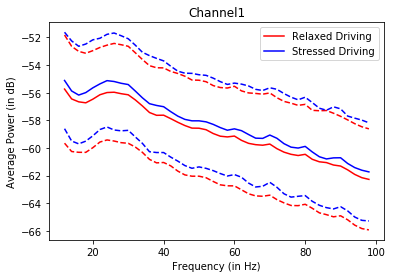

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pdr
import os
import glob as glob
import xlsxwriter
from scipy import signal
import statistics

dir_list = glob.glob('EMG_Spectrogram/PSD_Data/*.xlsx')
dir_list.sort()


sheets=['Stressed_Drive_C1','Relaxed_Drive_C1','Math_C1','Calm_C1']    
RD = pd.read_excel(dir_list[0], sheets[1],header=0)
powerdata_RD=np.empty((len(RD['Power']),len(dir_list)))
powerdata_SD=np.empty((len(RD['Power']),len(dir_list)))
powerdata_C=np.empty((len(RD['Power']),len(dir_list)))
powerdata_M=np.empty((len(RD['Power']),len(dir_list)))
Avg_RD=np.zeros((len(RD['Power'])))
Avg_SD=np.zeros((len(RD['Power'])))
Avg_C=np.zeros((len(RD['Power'])))
Avg_M=np.zeros((len(RD['Power'])))

stdev_RD=np.empty((len(RD['Power'])))
stdev_SD=np.empty((len(RD['Power'])))
stdev_C=np.empty((len(RD['Power'])))
stdev_M=np.empty((len(RD['Power'])))

freq=RD['freq']
for i in range(len(dir_list)):
    RD = pd.read_excel(dir_list[i], sheets[1],header=0)
    SD = pd.read_excel(dir_list[i], sheets[0],header=0)
    C = pd.read_excel(dir_list[i], sheets[3],header=0)
    M = pd.read_excel(dir_list[i], sheets[2],header=0)
    
    powerdata_RD[:,i]=10*np.log10(RD['Power'])
    powerdata_SD[:,i]=10*np.log10(SD['Power'])
    powerdata_C[:,i]=10*np.log10(C['Power'])
    powerdata_M[:,i]=10*np.log10(M['Power'])

    Avg_RD+=10*np.log10(RD['Power'])
    Avg_SD+=10*np.log10(SD['Power'])
    Avg_C+=10*np.log10(C['Power'])
    Avg_M+=10*np.log10(M['Power'])


Avg_RD=Avg_RD/len(dir_list)
Avg_SD=Avg_SD/len(dir_list)
Avg_C=Avg_C/len(dir_list)
Avg_M=Avg_M/len(dir_list)

for i in range(len(RD['Power'])):
    stdev_RD[i]=statistics.stdev(powerdata_RD[i,:])
    stdev_SD[i]=statistics.stdev(powerdata_SD[i,:])
    stdev_C[i]=statistics.stdev(powerdata_C[i,:])
    stdev_M[i]=statistics.stdev(powerdata_M[i,:])
    Avg_RD[i]=statistics.mean(powerdata_RD[i,:])
    Avg_SD[i]=statistics.mean(powerdata_SD[i,:])
    Avg_C[i]=statistics.mean(powerdata_C[i,:])
    Avg_M[i]=statistics.mean(powerdata_M[i,:])

plt.figure()
plt.plot(freq,Avg_RD,'r-',label='Relaxed Driving')
plt.plot(freq,Avg_RD+stdev_RD,'r--',label='')
plt.plot(freq,Avg_RD-stdev_RD,'r--',label='')
plt.plot(freq,Avg_SD,'b-',label='Stressed Driving')
plt.plot(freq,Avg_SD+stdev_SD,'b--',label='')
plt.plot(freq,Avg_SD-stdev_SD,'b--',label='')
plt.title('Channel1')
plt.xlabel('Frequency (in Hz)')
plt.ylabel('Average Power (in dB)')
plt.legend()

In [96]:
stdev_RD

array([3.47332617e-05, 3.12241328e-05, 2.95446573e-05, 2.64336773e-05,
       2.49408967e-05, 2.37173735e-05, 2.29031716e-05, 2.20597006e-05,
       2.10149598e-05, 2.07029448e-05, 1.93187901e-05, 1.87225473e-05,
       1.85167192e-05, 1.72965796e-05, 1.68527178e-05, 1.66077834e-05,
       1.74022524e-05, 1.72003992e-05, 1.61420630e-05, 1.63997975e-05,
       1.63691543e-05, 1.60013342e-05, 1.60520996e-05, 1.56258390e-05,
       1.55486317e-05, 1.61208867e-05, 1.69556934e-05, 1.68669379e-05,
       1.56079134e-05, 1.56354099e-05, 1.53354607e-05, 1.55706420e-05,
       1.56473220e-05, 1.57032910e-05, 1.56852308e-05, 1.54276878e-05,
       1.49608774e-05, 1.42121249e-05, 1.43361009e-05, 1.40536805e-05,
       1.34406321e-05, 1.28495657e-05, 1.24539849e-05, 1.17916507e-05])

In [98]:
statistics.mean(powerdata_RD[1,:])

1.46731684806519e-05

In [99]:
Avg_RD

0     0.000017
1     0.000015
2     0.000014
3     0.000012
4     0.000012
5     0.000012
6     0.000012
7     0.000011
8     0.000011
9     0.000010
10    0.000009
11    0.000009
12    0.000009
13    0.000008
14    0.000008
15    0.000008
16    0.000008
17    0.000007
18    0.000007
19    0.000007
20    0.000007
21    0.000007
22    0.000007
23    0.000006
24    0.000006
25    0.000006
26    0.000006
27    0.000006
28    0.000006
29    0.000006
30    0.000006
31    0.000006
32    0.000006
33    0.000006
34    0.000006
35    0.000006
36    0.000006
37    0.000006
38    0.000006
39    0.000006
40    0.000005
41    0.000005
42    0.000005
43    0.000005
Name: Power, dtype: float64

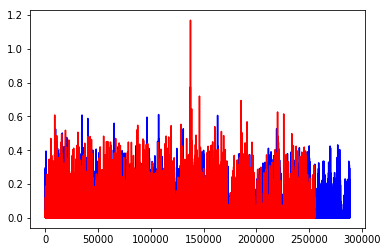

In [117]:

plt.plot(RD['Shimmer_D9BF_EMG_CH2_24BIT_CAL'][:],'b-')
plt.plot(SD['Shimmer_D9BF_EMG_CH2_24BIT_CAL'][:],'r-')

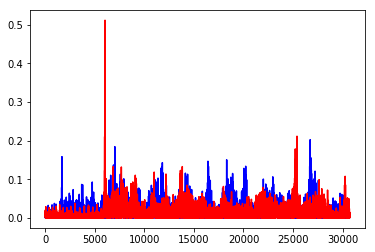

In [115]:
plt.plot(RD['Shimmer_D9BF_EMG_CH1_24BIT_CAL'][:512*60],'b-')
plt.plot(SD['Shimmer_D9BF_EMG_CH1_24BIT_CAL'][:512*60],'r-')

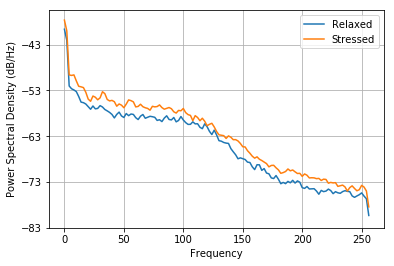

In [121]:
RD_Data=plt.psd(RD[RD.columns[col[channel[0]]]][:512*60], Fs=512)
SD_Data=plt.psd(SD[SD.columns[col[channel[0]]]][:512*60], Fs=512)
plt.legend(('Relaxed','Stressed'))

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy.signal import butter, lfilter, freqz, filtfilt
import pandas as pdr
import os
import glob as glob
import xlsxwriter
from scipy import signal
if not os.path.isdir('EMG_Spectrogram'):
    os.mkdir('EMG_Spectrogram')
if not os.path.isdir('EMG_Spectrogram/PSD_Data'):
    os.mkdir('EMG_Spectrogram/PSD_Data')
if not os.path.isdir('EMG_Spectrogram/Plots'):
    os.mkdir('EMG_Spectrogram/Plots')
sheets=['Rel_Dri','Str_Dri','Cal','Math']
dir_list = glob.glob('EMG_Filtered_Split/*.xlsx')
dir_list.sort()
i=0;j=0
channel=['C1','C2']
col={'C1':2,'C2':3}

RD = pd.read_excel(dir_list[i], sheets[0],header=0)
SD = pd.read_excel(dir_list[i], sheets[1],header=0)        
Data=RD[RD.columns[col[channel[0]]]][:512*60*7]
Data1=SD[SD.columns[col[channel[0]]]][:512*60*7]

Code for EMG Envelope

(0, 0.2)

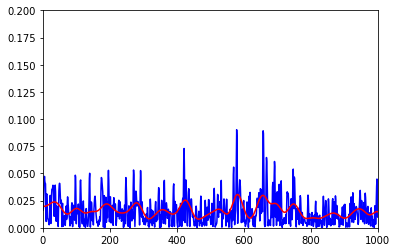

In [67]:
Data=RD[RD.columns[col[channel[0]]]][:512*60*8]
Data1=SD[SD.columns[col[channel[0]]]][:512*60*8]
b, a = butter(4, 10/256, btype='low', analog=False)
filtered=filtfilt(b, a, Data)
plt.plot(Data,'b')
plt.plot(filtered,'r')
plt.xlim((0,1000))
plt.ylim((0,0.2))

(0, 0.2)

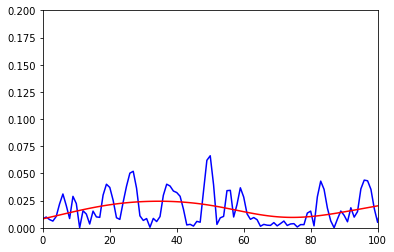

In [66]:
b, a = butter(4, 10/256, btype='low', analog=False)
filtered1=filtfilt(b, a, Data1)
plt.plot(Data1,'b')
plt.plot(filtered1,'r')
plt.xlim((0,100))
plt.ylim((0,0.2))

(0, 0.2)

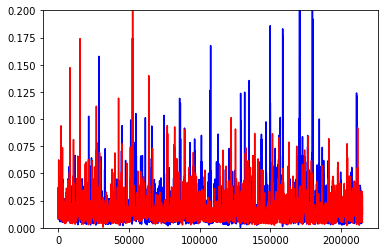

In [64]:
plt.plot(filtered,'b')
plt.plot(filtered1,'r')
plt.ylim((0,0.2))

In [68]:
from sklearn.metrics import auc
print(auc(RD['Shimmer_D9BF_Timestamp_Unix_CAL.1'][:512*60*8]/1000,filtered))
print(np.trapz(filtered, dx = 1/512))
print('Original Area')
print(auc(RD['Shimmer_D9BF_Timestamp_Unix_CAL.1'][:512*60*8]/1000,Data))
print(np.trapz(Data, dx = 1/512))

8.518752678968069
8.517159793677546
Original Area
8.519403902581315
8.517268129253758


In [70]:
from sklearn.metrics import auc
print(auc(SD['Shimmer_D9BF_Timestamp_Unix_CAL.1'][:512*60*8]/1000,filtered1))
print(np.trapz(filtered1, dx = 1/512))
print('Original Area')
print(auc(SD['Shimmer_D9BF_Timestamp_Unix_CAL.1'][:512*60*8]/1000,Data1))
print(np.trapz(Data1, dx = 1/512))

ValueError: Found input variables with inconsistent numbers of samples: [245760, 215040]

In [65]:
plt.close()